# Anopheles genomes phylogenetic scaffolding and evolution notebook

1. Yoann Aselmetti
2. Severine Berard
3. Eric Tannier
4. Cedric Chauve, Department of Mathematics, Simon Fraser University, cedric.chauve@sfu.ca

## Introduction

This notebook describes an improvement of the assembly of several mosquito genomes of the genus *Anopheles* using the newly developed phylogenetic scaffolding methods DeClone and ADseq.

In [1]:
import sys, math, numpy as np
%matplotlib inline  
import matplotlib, matplotlib.pyplot as plt

sys.path.insert(0, './scripts')
from declone_aux import *
from plotting import *

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Material and methods

In [2]:
# Reading the genes file
GENES_import(read_tab_file("./data/anopheles_genes_filtered"))
OG_import(read_tab_file("./data/anopheles_genes_filtered"))
GENOMES_import(read_tab_file("./data/anopheles_genes_filtered"))
# Reading the BESST file
BESST_import(read_tab_file("./data/anopheles_besst"))
# Reading the DeClone results file
DECLONE_import(read_tab_file("./results/anopheles_results_01_all"))

In [3]:
# Creating structures to access easily data and results

# Adjacencies: all adjacencies, ancestral adjacencies, extant adjacencies, scaffolding adjacencies
# Adjacencies can be interrogated using the DECLONE_adj_* functions from declone_aux.py
ALL_ADJ    = DECLONE_adjacencies_list()
ANC_ADJ    = [adj for adj in ALL_ADJ if DECLONE_adj_species_name(adj)=="ANCESTRAL"]
EXTANT_ADJ = [adj for adj in ALL_ADJ if DECLONE_adj_species_name(adj)!="ANCESTRAL"]
SCAFF_ADJ  = [adj for adj in EXTANT_ADJ if DECLONE_adj_score(adj)<1.0]

# Species: all species, extant species, ancestral species
# Each species is represented by a pair (node_id_in_newick_species_tree,name) where ancestral species have all the name "ANCESTRAL"
__ALL_SP_AUX={} # Temporary data structure
for adj in ALL_ADJ:
    __ALL_SP_AUX[(DECLONE_adj_species_id(adj),DECLONE_adj_species_name(adj))]=1
ALL_SPECIES    = [sp for sp in __ALL_SP_AUX.keys()]
EXTANT_SPECIES = [sp for sp in ALL_SPECIES if sp[1]!="ANCESTRAL"]
ANC_SPECIES    = [sp for sp in ALL_SPECIES if sp[1]=="ANCESTRAL"]

### Material

*Species tree (figure below), genes, chromosomes/scaffolds/contigs, gene families/orthogroups, gene trees*

<img src="images/anopheles_species_tree_labeled.png",width=600,height=600> 

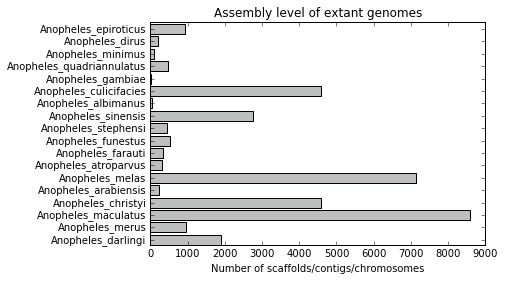

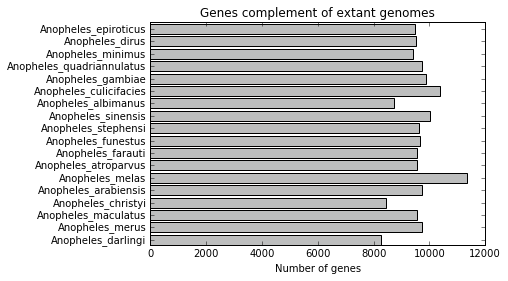

In [4]:
# Plotting the fragmentation and number of genes of each genome
GENOMES_EXTANT_FRAGMENTATION={sp[1]: {0: GENOMES_nbscf(sp[1])} for sp in EXTANT_SPECIES}
xlabel = "Number of scaffolds/contigs/chromosomes"
title  = "Assembly level of extant genomes"
plot_scores_distribution_per_species(GENOMES_EXTANT_FRAGMENTATION, 1, 0.5, xlabel, title,0.8)

GENOMES_EXTANT_NBGENES={sp[1]: {0: GENOMES_nbgenes(sp[1])} for sp in EXTANT_SPECIES}
xlabel = "Number of genes"
title  = "Genes complement of extant genomes"
plot_scores_distribution_per_species(GENOMES_EXTANT_NBGENES, 1, 0.5, xlabel, title,0.8)

### Methods

*ProfileNJ, DeClone, ADSeq, ideally joined into a single tool*

## Results

We now describe the results of our analysis, both in terms of scaffolding of extant *Anopheles* genomes, with a special focus on the genome *Anopheles funestus*, and of the ancestral genome maps we obtain, and what we can learn from them in terms of the evolution of the *Anopheles* genus.

In [5]:
# Here we record the number of adjacencies and conflicts for all species with adjacencies binned by bins of score 0.1
NB_BINS=10 # Binning the adjacencies by bins of size 0.1: bin i contains adjacencies of score <=0.1*i and <0.1*(i+1)
IVALUES=range(0,NB_BINS+1)
IVALUES1=range(0,NB_BINS)

ALL_ADJ_DISTRIB    = {sp: {t : 0 for t in IVALUES} for sp in ALL_SPECIES}
ANC_ADJ_DISTRIB    = {sp: {t : 0 for t in IVALUES} for sp in ANC_SPECIES}
EXTANT_ADJ_DISTRIB = {sp: {t : 0 for t in IVALUES} for sp in EXTANT_SPECIES}
SCAFF_ADJ_DISTRIB  = {sp: {t : 0 for t in IVALUES} for sp in EXTANT_SPECIES}
for adj in ALL_ADJ: 
    (score,species) = (DECLONE_adj_score(adj), (DECLONE_adj_species_id(adj),DECLONE_adj_species_name(adj)))
    score_bin=math.floor(score*NB_BINS)
    ALL_ADJ_DISTRIB[species][score_bin]+=1
    if species[1]=="ANCESTRAL":
        ANC_ADJ_DISTRIB[species][score_bin]+=1
    else:
        EXTANT_ADJ_DISTRIB[species][score_bin]+=1
        if score<1.0:
            SCAFF_ADJ_DISTRIB[species][score_bin]+=1

### Gene trees

*To do: describe the improvement of the new gene trees, gene content, duplications, ...*

### Scaffolding extant genomes: overview

In this section, we present a general overview of the scaffolding adjacencies inferred by the methods ADseq+DeClone.

In [ ]:
# Distribution of the scores of scaffolding adjacencies 
# CC: I do not know how to generate a nice table: this is a pis-aller
print("species name\t"+"\t".join(["<"+str(((t+1)/NB_BINS)) for t in __IVALUES1]))
print("\n".join(species[1][0:15]+"\t"+"\t".join(str(SCAFF_ADJ_DISTRIB[species][t]) for t in IVALUES1) for species in EXTANT_SPECIES))
# Figure
xlabel= "Number of scaffolding adjacencies per DeClone score (bins of size "+str(1.0/NB_BINS)+")"
title = "Distribution of DeClone scores"
plot_scores_distribution_per_species(SCAFF_ADJ_DISTRIB, NB_BINS, 1.0, xlabel, title, 0.8)

We can observe on the table and figure above that many adjacencies seem to have a high DeClone score, although for highly fragmented genomes, we can observe a large number of poorly supported adjacencies. 

We now look at the number of conflicts, defined as either a gene with three or more neighbours, without accounting for gene orientation in extant species.


In [8]:
# We now look at the conflicts
# We record the number of genes that belong to a conflict if restricted to all adjacencies of score 
# above a threshold. The thresholds are organized in bins of size 0.1
ANC_CONF_DISTRIB   = {sp: {t : 0 for t in IVALUES} for sp in ANC_SPECIES}
SCAFF_CONF_DISTRIB = {sp: {t : 0 for t in IVALUES} for sp in EXTANT_SPECIES}
__NGB_ALL={} # Number of neighbours of genes, indexed by pairs (tree,node)

def __adj_genes(a):
    return(((DECLONE_adj_gene1_tree(a),DECLONE_adj_gene1_node(a)),(DECLONE_adj_gene2_tree(a),DECLONE_adj_gene2_node(a))))
def __adj_score_species(a):
    return((DECLONE_adj_score(a),(DECLONE_adj_species_id(a),DECLONE_adj_species_name(a))))
for adj in ALL_ADJ: # Initializing the tables
    (gene1,gene2)=__adj_genes(adj)
    __NGB_ALL[gene1]={t : 0 for t in IVALUES}
    __NGB_ALL[gene2]={t : 0 for t in IVALUES}
for adj in ALL_ADJ: # Filling the tables of gene neighbours
    (score,species)=__adj_score_species(adj)
    score_bin=math.floor(score*NB_BINS)
    (gene1,gene2)=__adj_genes(adj)
    for i in range (0,score_bin+1):
        __NGB_ALL[gene1][i]+=1
        __NGB_ALL[gene2][i]+=1
    (__g1,__g2)=(False,False) # Boolean indicating if we detect a conflict at gene1 or gene2
    __TAB_TO_UPDATE=ANC_CONF_DISTRIB
    if species[1]!="ANCESTRAL":
        __TAB_TO_UPDATE=SCAFF_CONF_DISTRIB
    if __NGB_ALL[gene1][i]==3:
        for i in range (0,score_bin+1):
            __TAB_TO_UPDATE[species][i]+=1
    if __NGB_ALL[gene2][i]==3:
        for i in range (0,score_bin+1):
            __TAB_TO_UPDATE[species][i]+=1

species name	<0.1	<0.2	<0.3	<0.4	<0.5	<0.6	<0.7	<0.8	<0.9	<1.0
Anopheles_albim	0	0	0	0	0	0	0	0	0	0
Anopheles_atrop	36	14	2	0	0	0	0	0	0	0
Anopheles_culic	1128	675	672	663	617	540	462	433	413	398
Anopheles_sinen	343	241	239	215	173	134	86	79	69	56
Anopheles_minim	6	0	0	0	0	0	0	0	0	0
Anopheles_chris	604	249	249	243	231	190	176	162	151	138
Anopheles_gambi	0	0	0	0	0	0	0	0	0	0
Anopheles_darli	35	19	19	18	16	16	11	11	11	7
Anopheles_merus	92	38	37	37	36	31	28	25	24	21
Anopheles_dirus	13	6	6	5	5	5	5	5	5	3
Anopheles_epiro	101	36	33	33	31	31	28	24	20	19
Anopheles_farau	7	2	2	2	2	2	2	2	1	1
Anopheles_funes	46	22	22	16	13	12	11	11	10	7
Anopheles_macul	1928	1205	1186	1140	1019	667	584	572	545	531
Anopheles_quadr	58	23	20	18	18	17	14	12	12	12
Anopheles_melas	2440	1285	1260	1075	875	536	361	347	300	282
Anopheles_arabi	67	27	21	15	10	7	5	4	4	4
Anopheles_steph	32	16	16	16	15	13	8	8	6	5


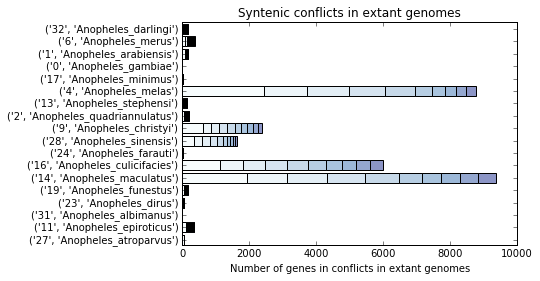

In [9]:
# CC: I do not know how to generate a nice table: this is a pis-aller
print("species name\t"+"\t".join(["<"+str(((t+1)/NB_BINS)) for t in IVALUES1]))
print("\n".join(species[1][0:15]+"\t"+"\t".join(str(SCAFF_CONF_DISTRIB[species][t]) for t in IVALUES1) for species in EXTANT_SPECIES))
# Figure
xlabel= "Number of genes in conflicts in extant genomes"
title = "Syntenic conflicts in extant genomes"
plot_scores_distribution_per_species(SCAFF_CONF_DISTRIB, NB_BINS, 1.0, xlabel, title,0.8)

### *Anopheles funestus* scaffolding

### Ancestral genomes and evolution

The DeClone/ADseq method infers both extant and ancestral adjacencies, thus paving the way to analyse the evolution of genome organization over the considered species tree.

#### Overview of ancestral adjacencies



We first look at the distribution of scores of ancestral adjacencies and at the number of conflicts.


sp_id	<0.1	<0.2	<0.3	<0.4	<0.5	<0.6	<0.7	<0.8	<0.9	<1.0	=1.0
33	640	11	25	46	44	59	118	81	107	5547	2938
21	2342	27	54	69	96	131	111	114	111	4794	7207
25	1833	26	107	102	206	98	104	76	69	5115	5468
15	2131	33	70	64	223	130	108	175	121	10140	579
7	3749	56	164	156	241	207	235	228	224	6201	5873
18	2296	33	56	55	131	113	114	118	111	7339	3746
30	1050	22	100	150	138	191	119	70	57	5331	5153
20	2370	29	39	62	112	121	85	91	100	4658	6849
26	1657	31	138	169	138	153	107	99	77	4644	7053
10	2433	26	89	104	177	182	266	246	172	8619	3233
5	3439	53	92	159	163	225	293	354	275	8950	2652
34	580	12	35	139	93	140	97	63	34	7946	0
8	3744	65	202	224	236	429	204	183	178	5820	6106
22	2230	61	127	117	114	135	148	127	143	4279	8081
29	1435	32	69	70	173	74	121	105	98	5142	4469
12	2424	47	75	125	126	140	151	159	181	5448	6637
3	3050	60	70	67	64	69	82	161	224	3683	6543


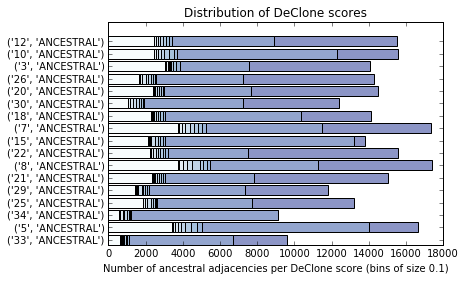

sp_id	<0.1	<0.2	<0.3	<0.4	<0.5	<0.6	<0.7	<0.8	<0.9	<1.0	=1.0
33	622	352	346	334	318	302	282	268	259	246	0
21	2844	1704	1690	1667	1631	1593	1533	1484	1436	1397	22
25	2074	1193	1171	1123	1075	1007	962	922	895	869	1
15	2586	1543	1530	1490	1458	1385	1334	1302	1258	1221	0
7	3552	1910	1878	1802	1727	1621	1536	1466	1398	1336	0
18	2637	1518	1499	1476	1450	1405	1354	1311	1264	1230	0
30	1691	1237	1226	1183	1133	1075	988	945	929	912	2
20	2642	1482	1469	1450	1419	1373	1315	1277	1234	1202	0
26	2317	1566	1550	1488	1396	1343	1286	1249	1212	1182	22
10	3293	2147	2133	2085	2051	1975	1885	1794	1723	1670	0
5	3463	1921	1888	1848	1768	1694	1600	1507	1396	1311	0
34	622	382	377	363	337	311	291	278	273	270	0
8	3486	1849	1814	1731	1646	1555	1445	1374	1316	1268	0
22	2787	1746	1719	1668	1611	1570	1514	1464	1426	1380	123
29	1335	704	689	656	629	566	533	501	474	453	0
12	3011	1882	1860	1823	1783	1741	1685	1626	1579	1525	0
3	2037	636	609	579	552	523	499	480	449	407	0


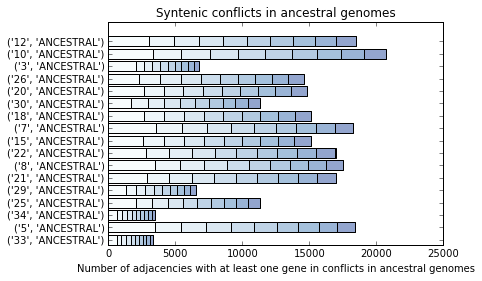

In [10]:
# CC: I do not know how to generate a nice table: this is a pis-aller
print("sp_id\t"+"\t".join(["<"+str(((t+1)/NB_BINS)) for t in IVALUES1])+"\t=1.0")
print("\n".join(species[0]+"\t"+"\t".join(str(ANC_ADJ_DISTRIB[species][t]) for t in IVALUES) for species in ANC_SPECIES))
# Figure
xlabel= "Number of ancestral adjacencies per DeClone score (bins of size "+str(1.0/NB_BINS)+")"
title = "Distribution of DeClone scores"
plot_scores_distribution_per_species(ANC_ADJ_DISTRIB, NB_BINS+1, 1.0, xlabel, title, 0.8)

# CC: I do not know how to generate a nice table: this is a pis-aller
print("sp_id\t"+"\t".join(["<"+str(((t+1)/NB_BINS)) for t in IVALUES1])+"\t=1.0")
print("\n".join(species[0]+"\t"+"\t".join(str(ANC_CONF_DISTRIB[species][t]) for t in IVALUES) for species in ANC_SPECIES))
# Figure
xlabel= "Number of adjacencies with at least one gene in conflicts in ancestral genomes"
title = "Syntenic conflicts in ancestral genomes"
plot_scores_distribution_per_species(ANC_CONF_DISTRIB, NB_BINS+1, 1.0, xlabel, title,0.8)

## Discussion

## References